# Importing the packages

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Loading the dataset

In [6]:
df = pd.read_csv('data.csv')

In [7]:
df.head()

id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN

[5 rows x 33 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
df.drop(columns='Unnamed: 32',axis=1,inplace=True)

In [10]:
df.isnull().values.any()

False

In [11]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
encoder = LabelEncoder()
df.diagnosis = encoder.fit_transform(df.diagnosis)

In [46]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [14]:
df.corr()

id  ...  fractal_dimension_worst
id                       1.000000  ...                -0.029866
diagnosis                0.039769  ...                 0.323872
radius_mean              0.074626  ...                 0.007066
texture_mean             0.099770  ...                 0.119205
perimeter_mean           0.073159  ...                 0.051019
area_mean                0.096893  ...                 0.003738
smoothness_mean         -0.012968  ...                 0.499316
compactness_mean         0.000096  ...                 0.687382
concavity_mean           0.050080  ...                 0.514930
concave points_mean      0.044158  ...                 0.368661
symmetry_mean           -0.022114  ...                 0.438413
fractal_dimension_mean  -0.052511  ...                 0.767297
radius_se                0.143048  ...                 0.049559
texture_se              -0.007526  ...                -0.045655
perimeter_se             0.137331  ...                 0.085433
area_se                  0.177742  ...                 0.017539
smoothness_se            0.096781  ...                 0.101480
compactness_se           0.033961  ...                 0.590973
concavity_se             0.055239  ...                 0.439329
concave points_se        0.078768  ...                 0.310655
symmetry_se             -0.017306  ...                 0.078079
fractal_dimension_se     0.025725  ...                 0.591328
radius_worst             0.082405  ...                 0.093492
texture_worst            0.064720  ...                 0.219122
perimeter_worst          0.079986  ...                 0.138957
area_worst               0.107187  ...                 0.079647
smoothness_worst         0.010338  ...                 0.617624
compactness_worst       -0.002968  ...                 0.810455
concavity_worst          0.023203  ...                 0.686511
concave points_worst     0.035174  ...                 0.511114
symmetry_worst          -0.044224  ...                 0.537848
fractal_dimension_worst -0.029866  ...                 1.000000

[32 rows x 32 columns]

In [15]:
df.drop(columns='id',axis=1,inplace=True)

In [16]:
X = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

In [17]:
y = df['diagnosis']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model = LogisticRegression(solver='liblinear')

In [22]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
y_pred = model.predict(X_test)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [25]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[118   3]
 [  3  64]]


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       121
           1       0.96      0.96      0.96        67

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



In [27]:
print((accuracy_score(y_test,y_pred)*100),"%")

96.80851063829788 %


# Decision tree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123)

dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [29]:
y_pred=dtree.predict(X_test)
print(confusion_matrix(y_test,y_pred))

[[111  10]
 [  4  63]]


In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       121
           1       0.86      0.94      0.90        67

    accuracy                           0.93       188
   macro avg       0.91      0.93      0.92       188
weighted avg       0.93      0.93      0.93       188



In [31]:
print(accuracy_score(y_test,y_pred)*100)

92.5531914893617


# Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
y_pred=rfc.predict(X_test)

In [34]:
print(confusion_matrix(y_test,y_pred))

[[118   3]
 [  5  62]]


In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       121
           1       0.95      0.93      0.94        67

    accuracy                           0.96       188
   macro avg       0.96      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188



In [36]:
print(accuracy_score(y_test,y_pred)*100)


95.74468085106383


# KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [38]:
y_pred=knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error,r2_score


In [39]:
print(confusion_matrix(y_test,y_pred))

[[119   2]
 [  3  64]]


In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       121
           1       0.97      0.96      0.96        67

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



In [41]:
print(accuracy_score(y_test,y_pred)*100)

97.3404255319149


# Data Visualisation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


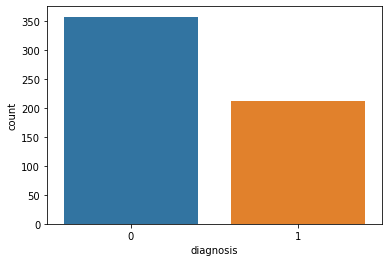

In [42]:
sns.countplot(df['diagnosis'],label="Count")

In [43]:
features = df[['radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'symmetry_worst',
       'fractal_dimension_worst','diagnosis']]


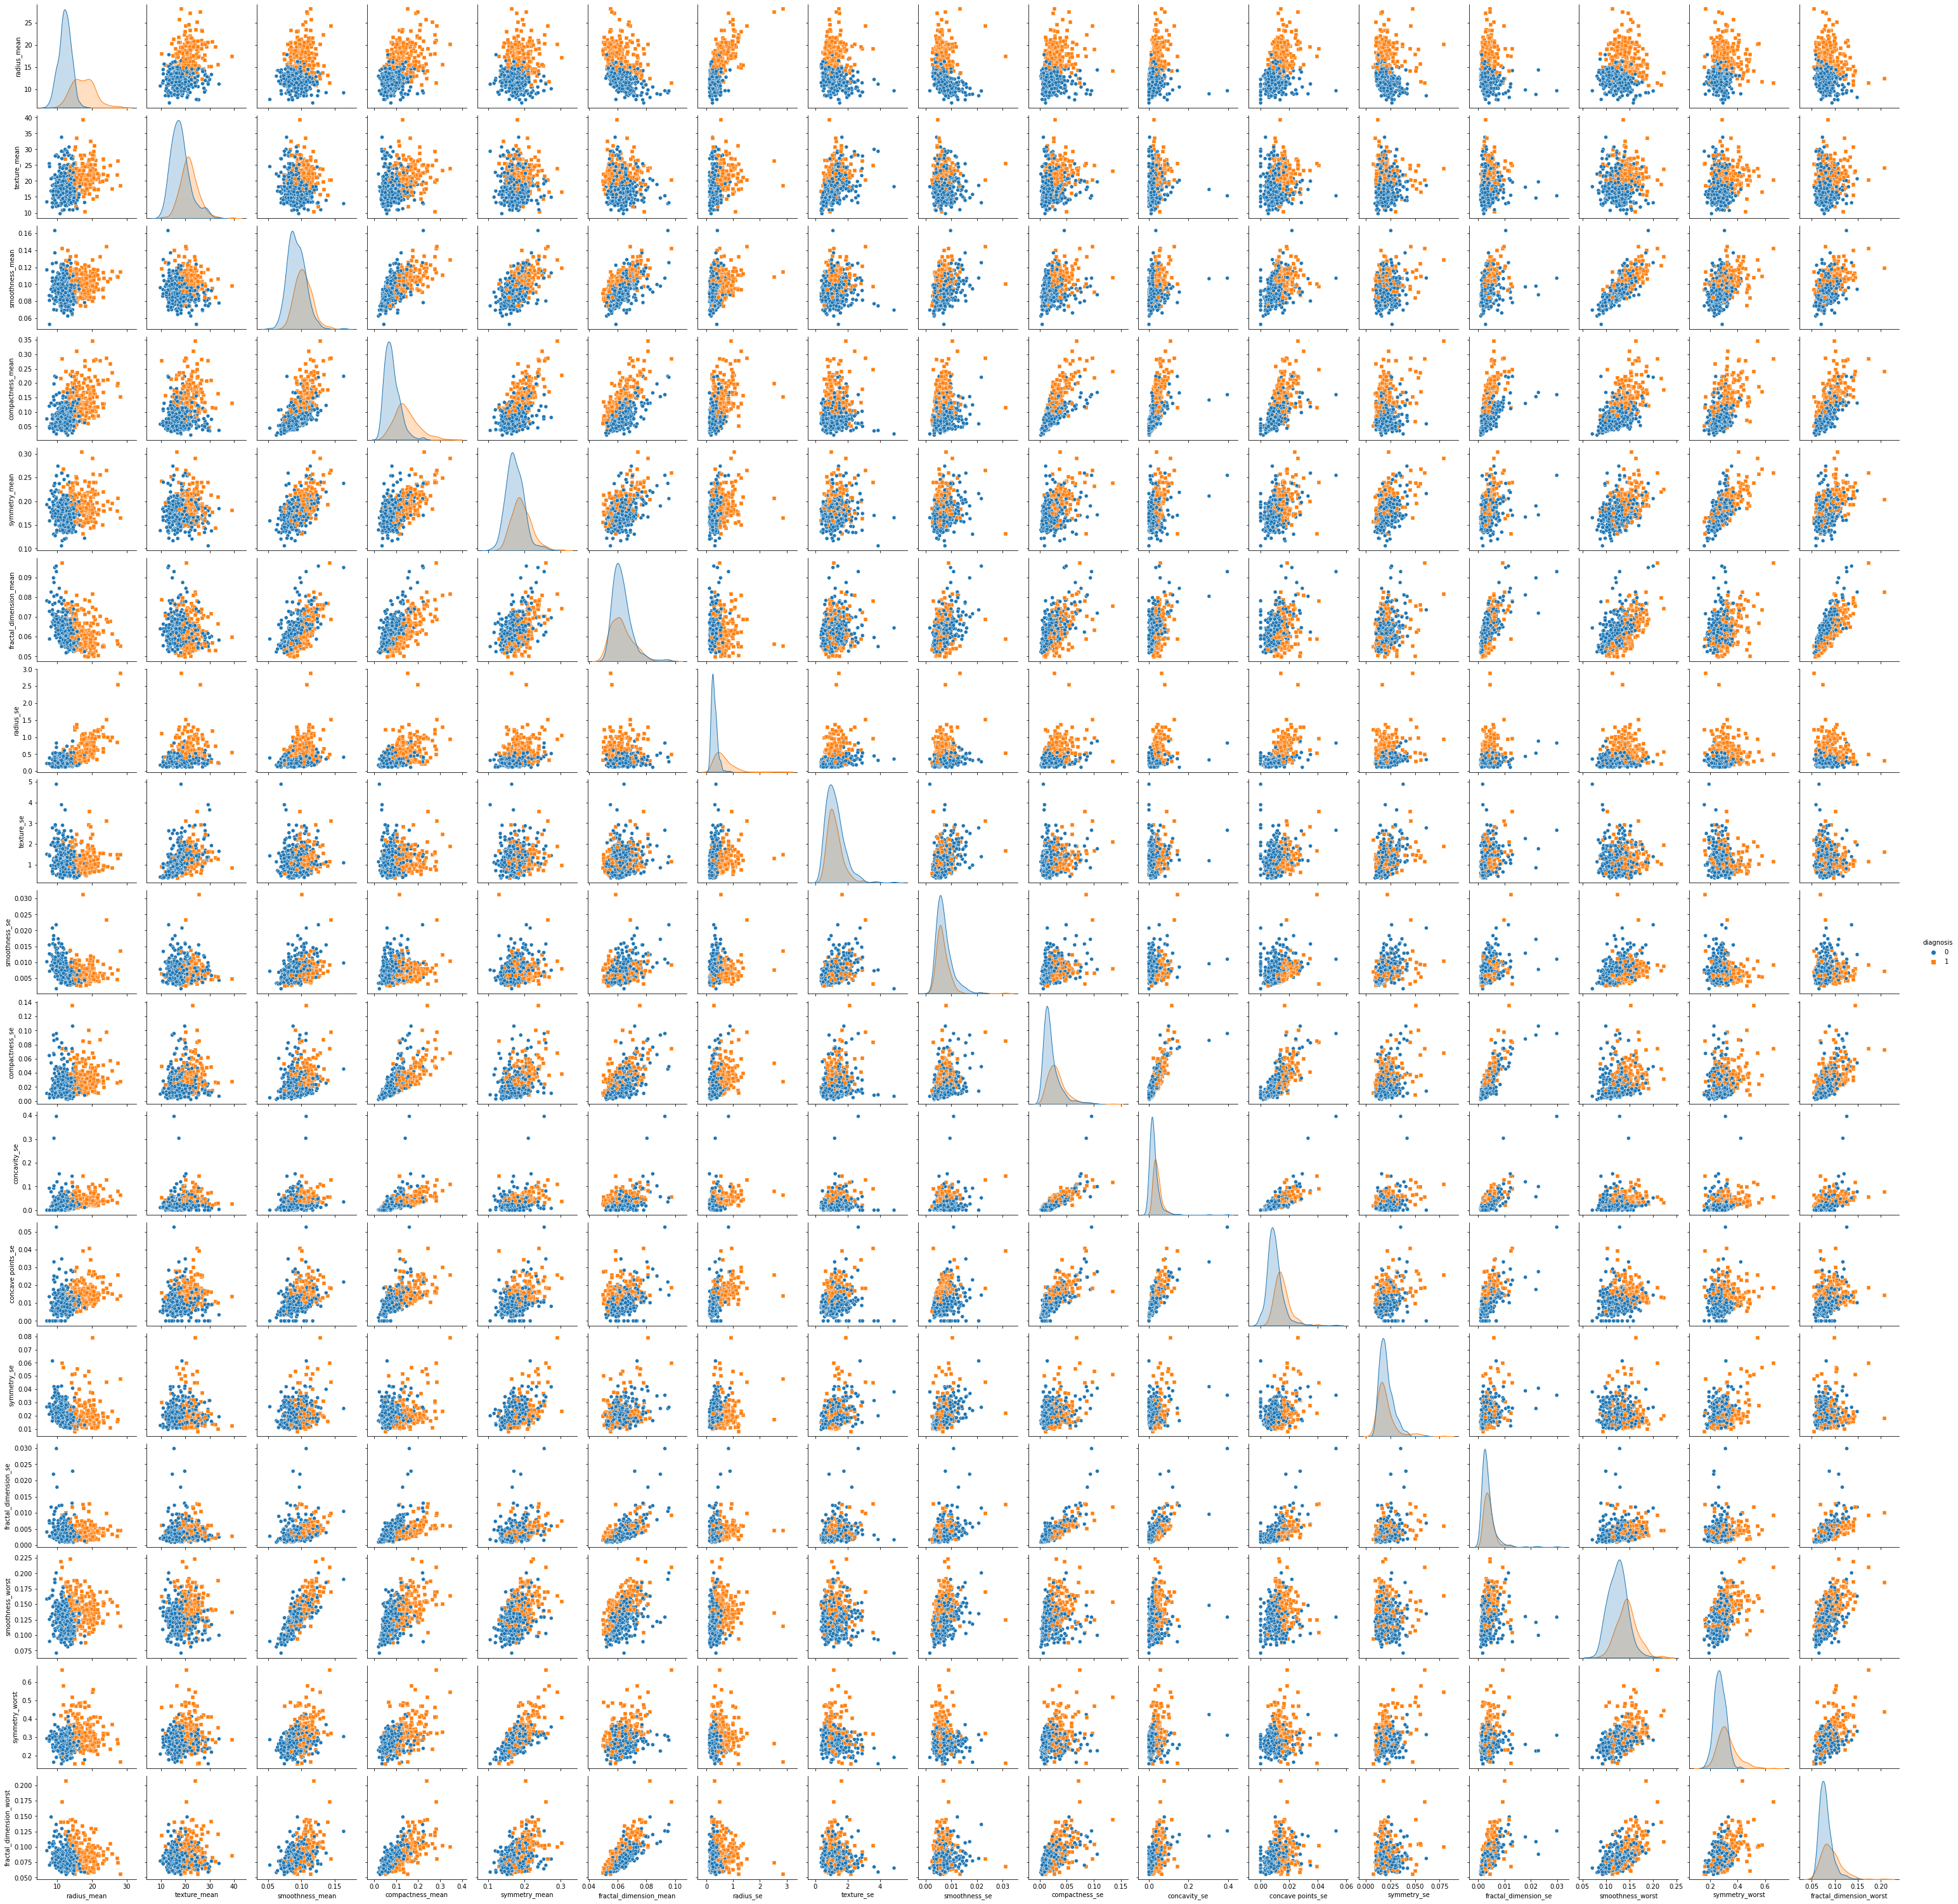

In [47]:
sns.pairplot(features, hue='diagnosis', markers=["o", "s"])

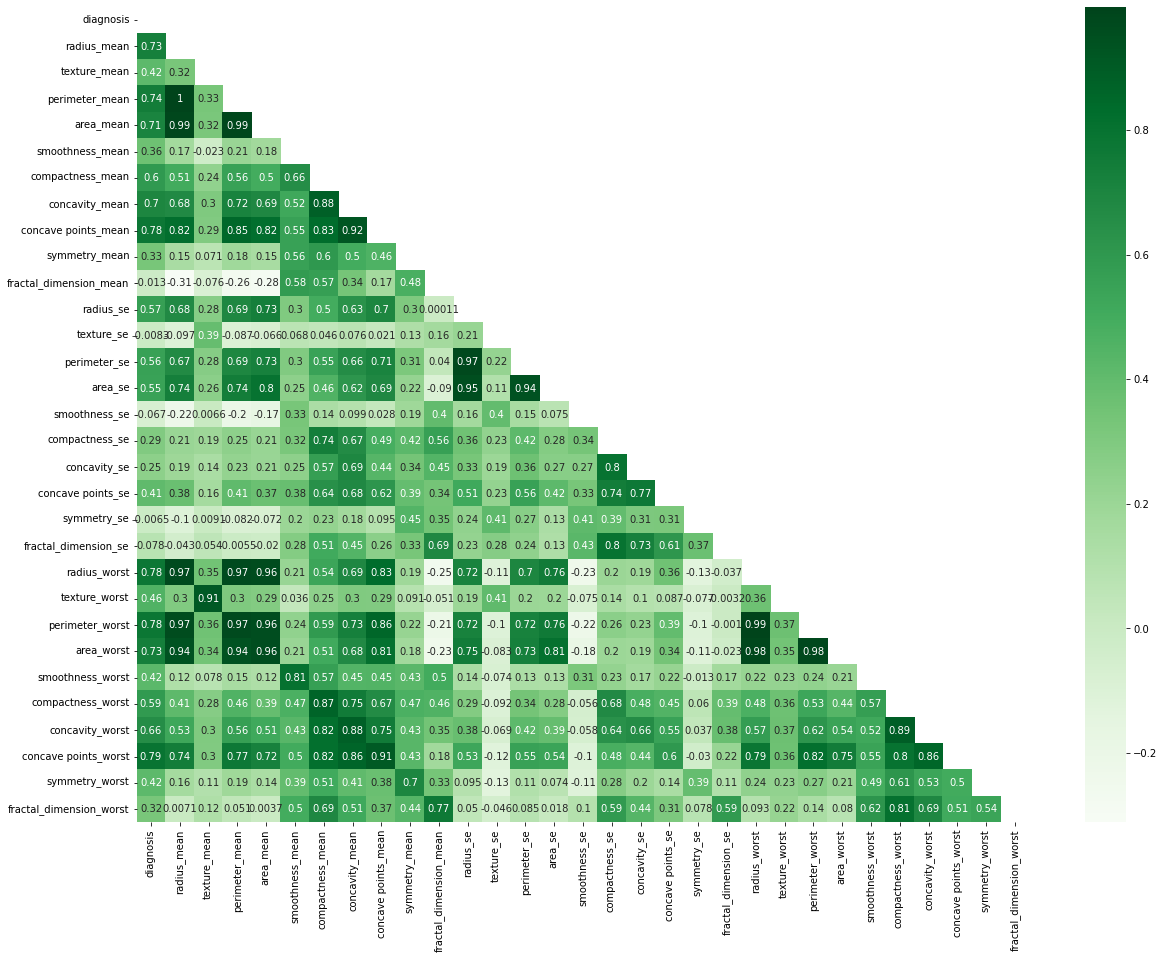

In [45]:
plt.figure(figsize=(20,15))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), annot=True, cmap='Greens', mask=mask)
plt.show()